# Regression - Exploration Exercises

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named explore.ipynb. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).

1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [1]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# https://seaborn.pydata.org/tutorial/color_palettes.html
# https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

# set seaborn color palette
sns.color_palette("crest")
pal = sns.set_palette('crest')

# import models
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import sklearn.feature_selection as feat_select
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, normalize

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import custom functions
import acquire
import prepare
import explore

In [2]:
df = acquire.get_telco_data()

In [3]:
df.total_charges = df.total_charges.fillna(value=0)

In [4]:
# Split the data to ready for exploration, modeling, and testing
# Using the prepare custom function, take in a DataFrame and return train, validate, and test DataFrames; 
# Stratify on churn

train, validate, test = prepare.split_data(df)

In [5]:
train.head()

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type
5652,5652,3454-JFUBC,Male,1,No,No,68,Yes,No,3,...,4,20.00,1396,No,3,Two year,3,None,4,Credit card (automatic)
4453,4453,3727-OWVYD,Male,0,No,No,35,Yes,No,1,...,2,61.20,2021.2,No,2,One year,1,DSL,2,Mailed check
4945,4945,5583-EJXRD,Male,0,Yes,Yes,44,No,No phone service,1,...,4,54.05,2375.2,No,3,Two year,1,DSL,4,Credit card (automatic)
3252,3252,2305-MRGLV,Male,0,Yes,No,28,Yes,No,2,...,3,76.55,2065.4,No,1,Month-to-month,2,Fiber optic,3,Bank transfer (automatic)
3651,3651,9496-IVVRP,Female,0,Yes,Yes,11,Yes,No,1,...,3,51.00,581.7,No,1,Month-to-month,1,DSL,3,Bank transfer (automatic)


2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [10]:
sns.set_theme(color_codes=True)

In [20]:
def plot_variable_pairs(df):
    
    sns.pairplot(train.drop(columns=['Unnamed: 0', 'customer_id']),hue = 'churn',diag_kind = "kde",kind = "scatter",palette = "husl")

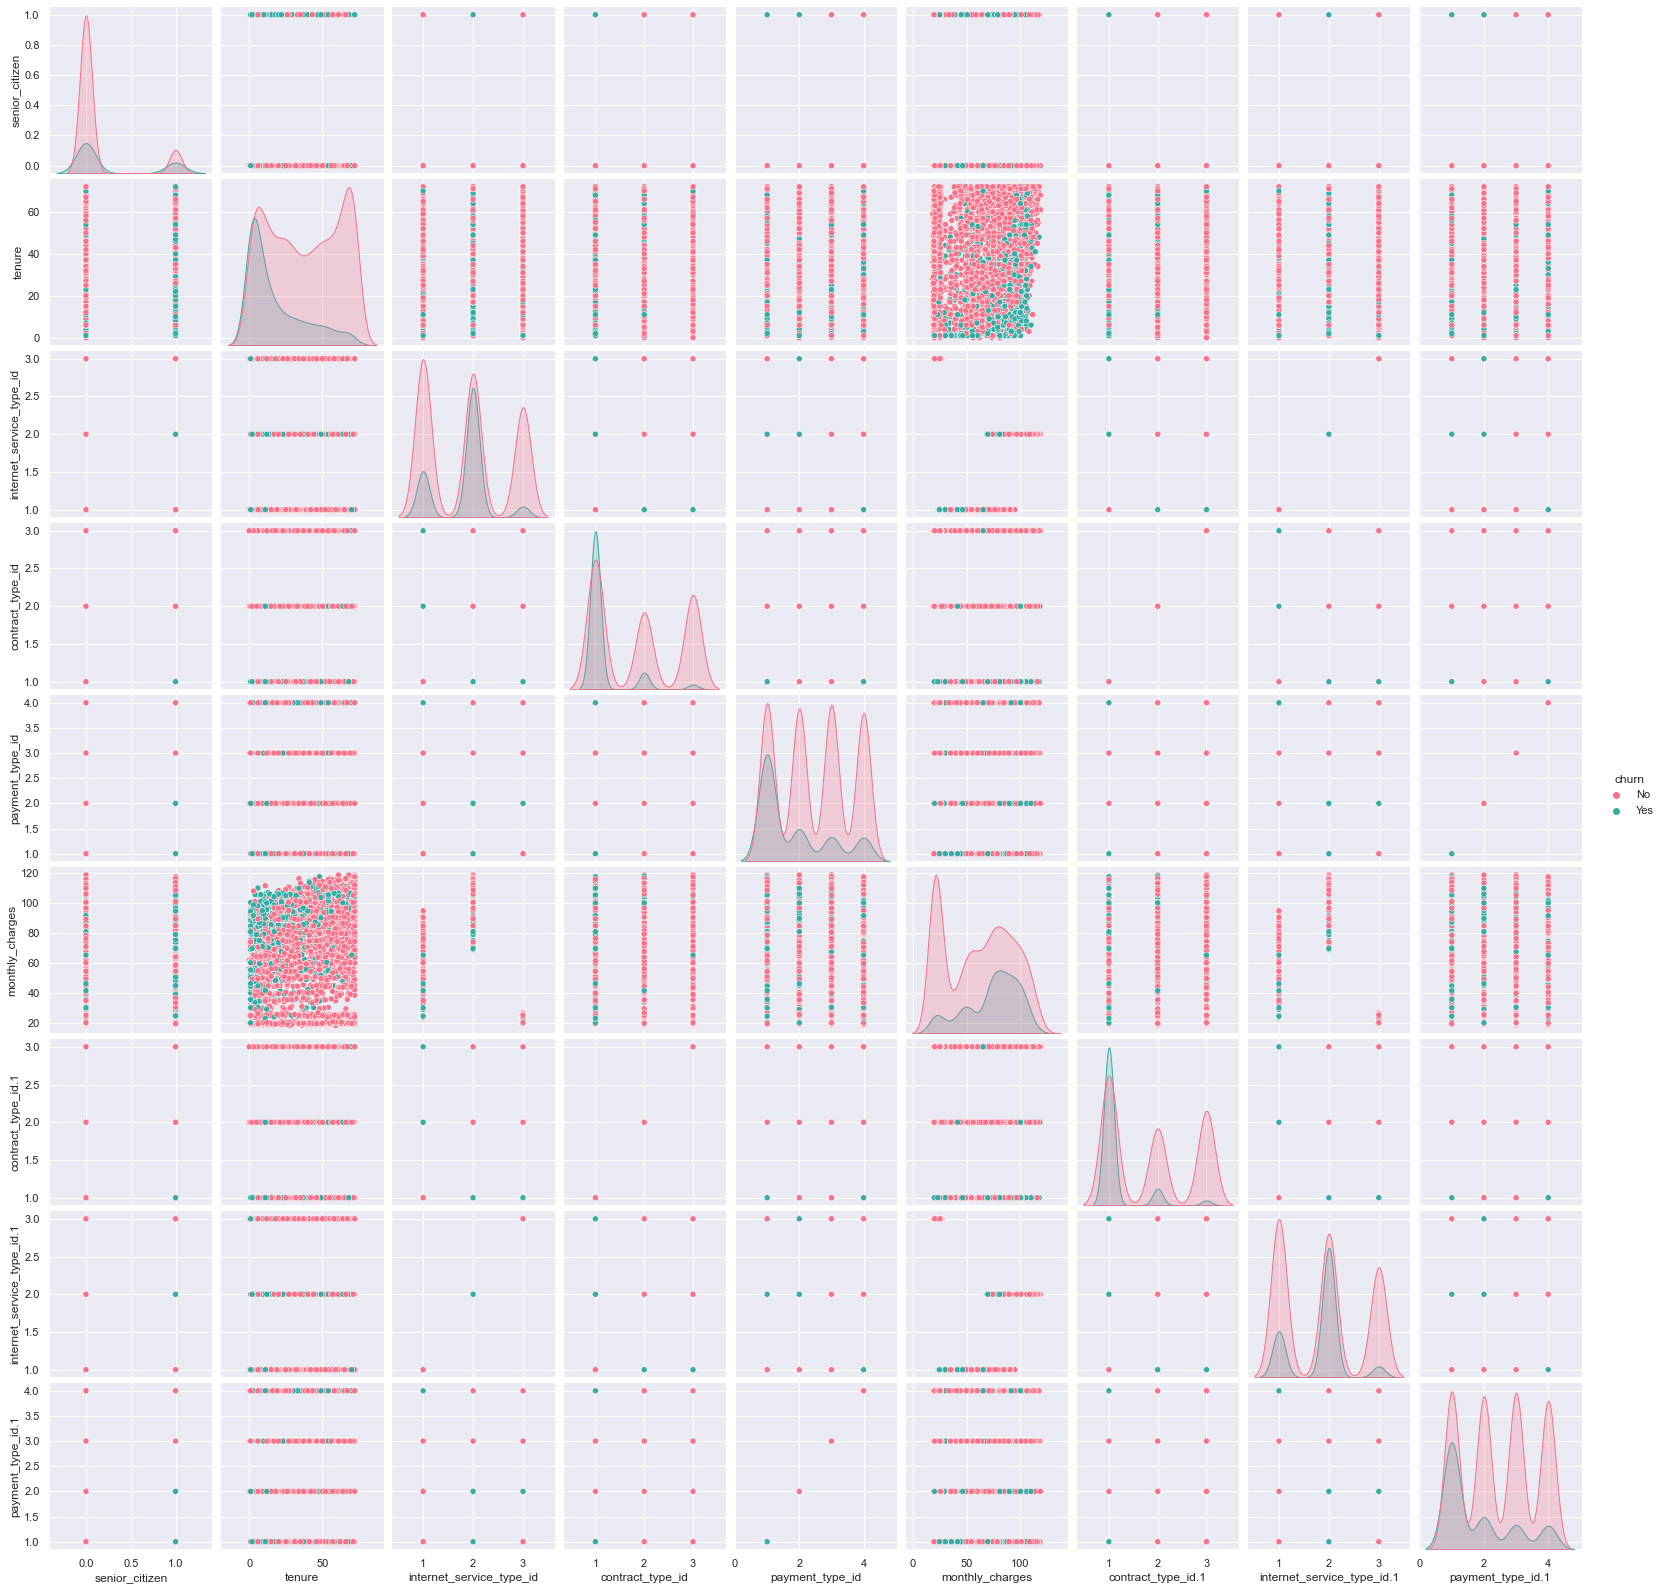

In [22]:
plot_variable_pairs(train)

3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [26]:
def months_to_years(df):
    tenure_years = (df.tenure / 12)
    df['tenure_years'] = tenure_years.round()
    
    return df

In [27]:
months_to_years(train)

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,...,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type,tenure_years
5652,5652,3454-JFUBC,Male,1,No,No,68,Yes,No,3,...,20.00,1396,No,3,Two year,3,None,4,Credit card (automatic),6.0
4453,4453,3727-OWVYD,Male,0,No,No,35,Yes,No,1,...,61.20,2021.2,No,2,One year,1,DSL,2,Mailed check,3.0
4945,4945,5583-EJXRD,Male,0,Yes,Yes,44,No,No phone service,1,...,54.05,2375.2,No,3,Two year,1,DSL,4,Credit card (automatic),4.0
3252,3252,2305-MRGLV,Male,0,Yes,No,28,Yes,No,2,...,76.55,2065.4,No,1,Month-to-month,2,Fiber optic,3,Bank transfer (automatic),2.0
3651,3651,9496-IVVRP,Female,0,Yes,Yes,11,Yes,No,1,...,51.00,581.7,No,1,Month-to-month,1,DSL,3,Bank transfer (automatic),1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4284,4284,7593-XFKDI,Male,0,No,No,1,Yes,No,1,...,46.30,46.3,Yes,1,Month-to-month,1,DSL,2,Mailed check,0.0
415,415,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,2,...,108.45,7076.35,No,2,One year,2,Fiber optic,1,Electronic check,6.0
1142,1142,5276-KQWHG,Female,1,No,No,2,Yes,No,2,...,69.60,131.65,Yes,1,Month-to-month,2,Fiber optic,1,Electronic check,0.0
4254,4254,6752-APNJL,Male,0,Yes,Yes,42,Yes,No,1,...,54.50,2301.15,No,1,Month-to-month,1,DSL,2,Mailed check,4.0


4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [ ]:
def plot_categorical_and_continuous_vars(df, cont_cols, cat_cols):
    
    
    
    

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

6. Explore your dataset with any other visualizations you think will be helpful.

7. In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.